In [2]:
#Conexión con google drive

from google.colab import drive
drive.mount('/content/drive')
#Rutas de paquetes de datos.

GPath =  '/content/drive/My Drive/Kaggle/Titanic/Datos/Inputs'
train_path = GPath + "/train.csv"
test_path = GPath + "/test.csv"


Mounted at /content/drive


##Visualización de datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print("El número de entradas en la tabla de entrenamiento es: " + str(train_data.shape[0]) + ". Cada entrada tiene " + str(train_data.shape[1]) + " columnas.")
print("El número de entradas en la tabla de test es: " + str(test_data.shape[0]) + ". Cada entrada tiene " + str(test_data.shape[1]) + " columnas.")

El número de entradas en la tabla de entrenamiento es: 891. Cada entrada tiene 12 columnas.
El número de entradas en la tabla de test es: 418. Cada entrada tiene 11 columnas.


In [8]:
def plotMissingParams(data,color="blue",val=False):
  plt.figure(figsize = (13,5))
  if val:
    plt.bar(test_data.columns, test_data.isnull().sum().values, color = color)
  else:
    plt.bar(data.columns, train_data.isna().sum(),color=color)
  plt.xlabel("Nombre de las columnas")
  plt.ylabel("Número celdas vacías")
  plt.show()

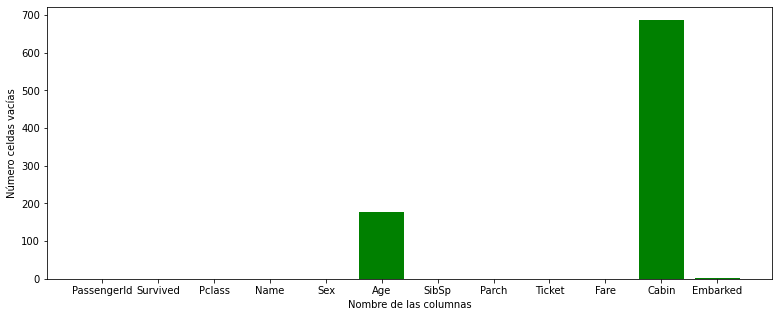

In [9]:
plotMissingParams(train_data,color="green")

# Podemos asegurar que hay tres campos con elementos faltantes(Age,Cabin,Embarked). Tendremos que abordar este problema más tarde.

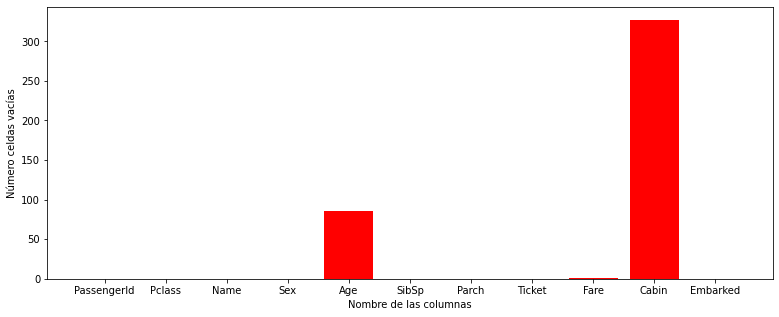

In [10]:
plotMissingParams(test_data,color="red",val=True)

# En los datos de test sucede lo mismo, solo que esta vez las clases afectadas son age,fare y cabin.

In [11]:
def visualComparative(studyType,data,type=0,hue=""):
  if type == 0:

   if hue ==  "" : 
     sns.countplot(x=studyType,data=data)
   else:
     sns.countplot(x=studyType,hue=hue,data=data)
   
  else:

    if hue ==  "" : 
     sns.boxplot(x=studyType,data=data)
    else:
     sns.boxplot(x=studyType,hue=hue,data=data)

  plt.show()


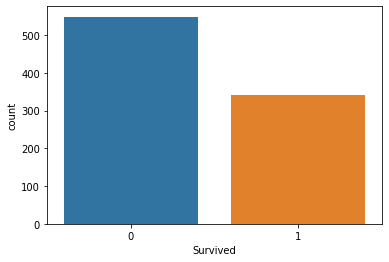

In [12]:
visualComparative("Survived",train_data)

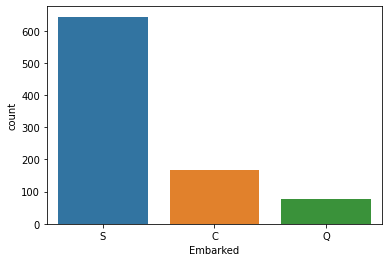

In [13]:
visualComparative("Embarked",train_data)

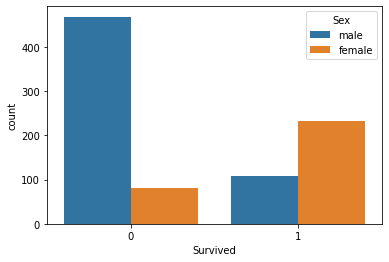

In [14]:
visualComparative("Survived",train_data,hue="Sex")

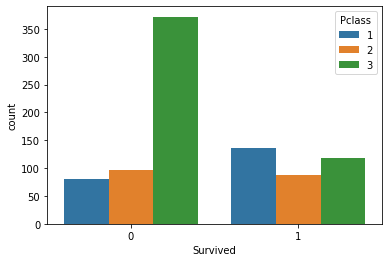

In [15]:
visualComparative("Survived",train_data,hue="Pclass")

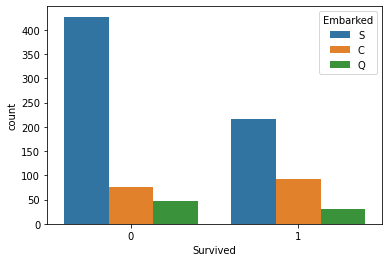

In [16]:
visualComparative("Survived",train_data,hue="Embarked")

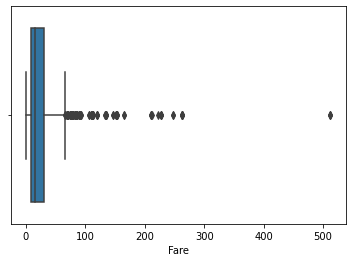

In [17]:
visualComparative("Fare",data = train_data,type=1)

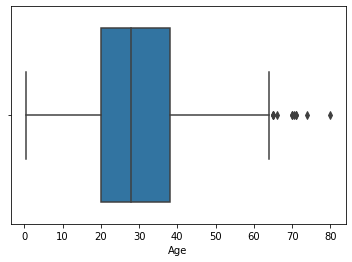

In [18]:
visualComparative("Age",data = train_data,type=1)

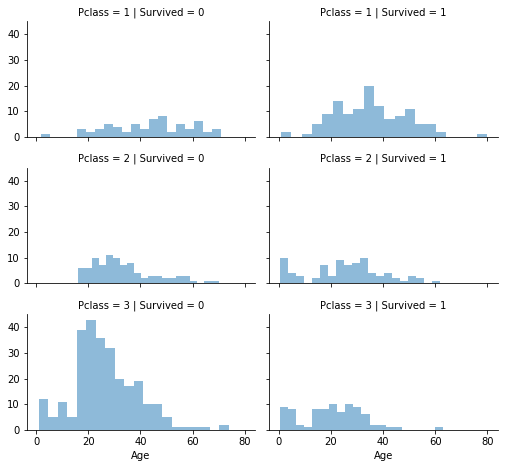

In [19]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

## Tratando valores vacíos

In [20]:
# Primero trataremos las cabinas. Falta demasiada información luego las tiraresmos del dataframe.
tr_d = train_data.drop("Cabin",1)
te_d = test_data.drop("Cabin",1)

In [21]:
#A continuación tratamos la edad y el precio del billete. Ambos los sustituiremos por la media.
#Primero unimos los datos de test y entrenamiento.
def printCombineDataNulls(train_data,test_data):  
  combined_data = [train_data, test_data]
  for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)
  return combined_data

c_d = printCombineDataNulls(tr_d,te_d)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [22]:
def replaceWithMean(full_data,val=""):
  for data in full_data:
    data = data[val].fillna(data[val].mean(),inplace=True)


replaceWithMean(c_d ,val="Age")
replaceWithMean(c_d ,val="Fare")

In [23]:
tr_d.Embarked.fillna("S",inplace=True)

## Codificación

In [24]:
def embarkedEncoding(dic,atribute,data):
  data[atribute]=data[atribute].map(dic)
  return data

genderDict = {'female':1, 'male':0}
embarkedDict = {'S':1,'C':2,'Q':0}

data = embarkedEncoding(genderDict,"Sex",tr_d)
data = embarkedEncoding(genderDict,"Sex",te_d)
data = embarkedEncoding(embarkedDict,"Embarked",tr_d)
data = embarkedEncoding(embarkedDict,"Embarked",te_d)

In [25]:
tr_d['Alone'] = tr_d.SibSp + tr_d.Parch
te_d['Alone'] = te_d.SibSp + te_d.Parch

tr_d.Alone = tr_d.Alone.apply(lambda x: 1 if x == 0 else 0)
tr_d.Alone = tr_d.Alone.apply(lambda x: 1 if x == 0 else 0)

In [26]:
tr_d.drop(['SibSp','Parch'], axis = 1, inplace = True)
te_d.drop(['SibSp','Parch'], axis = 1, inplace = True )

In [27]:
combined_data = [tr_d,te_d]
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)


In [28]:
tr_d.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Lady          1
Countess      1
Capt          1
Mme           1
Sir           1
Ms            1
Don           1
Name: Title, dtype: int64

In [29]:
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
       
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

In [30]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

In [31]:
columns_to_drop = ['PassengerId','Ticket']
tr_d.drop(columns_to_drop, axis = 1, inplace = True)
te_d.drop(columns_to_drop[1], axis = 1, inplace = True)

In [32]:
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [33]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

In [34]:
X_train = tr_d.drop("Survived", axis=1)
Y_train = tr_d["Survived"]
X_test = te_d.drop("PassengerId", axis = 1)
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

Shape of X_train (891, 7)
Shape of Y_train (891,)
Shape of x_test (418, 7)


In [35]:
X_train = tr_d.drop("Survived", axis=1)
Y_train = tr_d["Survived"]
X_test = te_d.drop("PassengerId", axis = 1)
print(X_test.head())
print(X_train.head())

   Pclass  Sex  Age  Fare  Embarked  Alone  Title
0       3    0  2.0   1.0         0      0      1
1       3    1  2.0   1.0         1      1      3
2       2    0  3.0   1.0         0      0      1
3       3    0  1.0   1.0         1      0      1
4       3    1  1.0   1.0         1      2      3
   Pclass  Sex  Age  Fare  Embarked  Alone  Title
0       3    0  1.0   1.0         1      1      1
1       1    1  2.0   3.0         2      1      3
2       3    1  1.0   1.0         1      0      2
3       1    1  2.0   3.0         1      1      3
4       3    0  2.0   1.0         1      0      1


## Selección de características.

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier

In [39]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train, Y_train)
set_printoptions(precision=4)
print(fit.scores_)
features = fit.transform(X_train)
print(features[0:5,:])

#En este caso tomaremos  las columnas 0,1,3,7

[115.0313 372.4057   1.7088  80.0034  14.3305  38.3537 183.9828]
[[3. 0. 1. 1.]
 [1. 1. 3. 3.]
 [3. 1. 1. 2.]
 [1. 1. 3. 3.]
 [3. 0. 1. 1.]]


In [40]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

#En este caso tomaremos  las columnas 0,1,2,7

Num Features: 4
Selected Features: [ True  True  True False False False  True]
Feature Ranking: [1 1 1 4 3 2 1]


In [41]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, Y_train)
print(model.feature_importances_)

#En este caso tomaremos  las columnas 0,1,3,7

[0.1899 0.3449 0.085  0.0894 0.0625 0.0362 0.1922]


In [42]:
X_train = tr_d.drop("Fare", axis=1)
X_train = X_train.drop("Embarked", axis=1)
X_train = X_train.drop("Alone", axis=1)
X_train = X_train.drop("Survived", axis=1)

Y_train = tr_d["Survived"]

X_test = te_d.drop("PassengerId", axis = 1)
X_test = X_test.drop("Fare", axis=1)
X_test = X_test.drop("Embarked", axis=1)
X_test = X_test.drop("Alone", axis=1)


In [43]:
print(X_test.head())
print(X_train.head())

   Pclass  Sex  Age  Title
0       3    0  2.0      1
1       3    1  2.0      3
2       2    0  3.0      1
3       3    0  1.0      1
4       3    1  1.0      3
   Pclass  Sex  Age  Title
0       3    0  1.0      1
1       1    1  2.0      3
2       3    1  1.0      2
3       1    1  2.0      3
4       3    0  2.0      1


## Entrenamiento

In [117]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [76]:
def decodeBlock(n_neurons,bachnorm = True,dropout = 0.2):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(n_neurons))

  if bachnorm:
    model.add(tf.keras.layers.BatchNormalization())

  if dropout > 0:
    model.add(tf.keras.layers.Dropout(dropout))
  
  model.add(tf.keras.layers.PReLU())

  return model

In [46]:
def codeBlock(n_neurons,dropout = 0.2):

  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(n_neurons))

  if dropout > 0:
    model.add(tf.keras.layers.Dropout(dropout))
  
  model.add(tf.keras.layers.PReLU())

  return model

In [94]:
inputs = tf.keras.layers.Input(shape=[4])

x = inputs

x = codeBlock(2048)(x)
x = codeBlock(4096,0.4)(x)
x = decodeBlock(2048,dropout = 0.4)(x)
x = decodeBlock(2048,dropout = 0.4)(x)
x = decodeBlock(1024,dropout = 0.4)(x)
x = decodeBlock(1024,dropout = 0.2)(x)
x = decodeBlock(1024,dropout = 0.2)(x)
x = decodeBlock(512,dropout = 0.1)(x)


last = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=last)
 
#tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [78]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss',
                                           patience = 10,
                                           mode = 'min')

In [104]:
ams_grad = tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam'
)

In [110]:
model.compile(optimizer = ams_grad, loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, Y_train , epochs = 200,batch_size = 1024,verbose = 1,callbacks = [callback])

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.4216 - acc: 0.8047
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 0.4197 - acc: 0.7901
Epoch 3/200
1/1 [==============================] - 3s 3s/step - loss: 0.4291 - acc: 0.8002
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 0.4153 - acc: 0.8092
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 0.4201 - acc: 0.8103
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 0.4216 - acc: 0.8025
Epoch 7/200
1/1 [==============================] - 3s 3s/step - loss: 0.4197 - acc: 0.8036
Epoch 8/200
1/1 [==============================] - 3s 3s/step - loss: 0.4210 - acc: 0.8114
Epoch 9/200
1/1 [==============================] - 3s 3s/step - loss: 0.4200 - acc: 0.8013
Epoch 10/200
1/1 [==============================] - 3s 3s/step - loss: 0.4131 - acc: 0.8103
Epoch 11/200
1/1 [==============================] - 3s 3s/step - loss: 0.4196 - acc: 0.80

In [111]:
predict = model.predict(X_test)

In [112]:
predict = (predict > 0.5).astype(int).ravel()

In [113]:
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

Precision :  79.3
Accuracy :  80.36
Recall :  66.08
F1 score :  72.09
AUC :  77.67


## Submision

In [116]:
submit = pd.DataFrame({"PassengerId":te_d.PassengerId, 'Survived':predict})
submit.to_csv("../final_submission.csv",index = False)